In [1]:
# importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
%matplotlib inline

In [2]:
# getting address of csv file and reading it
address = 'C:/Users/malav/OneDrive/Desktop/python/Machine Learning/student_scores - student_scores.csv'
student_scores = pd.read_csv(address)

In [3]:
# displaying the data
student_scores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


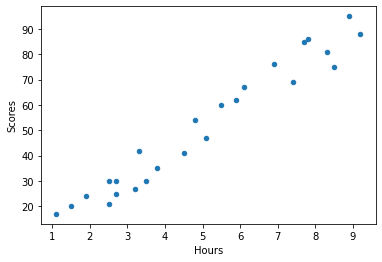

In [4]:
# plotting the hours vs scores scatter plot to check out for a relation between them
student_scores.plot(kind = 'scatter', x = 'Hours', y = 'Scores')
plt.show()

In [5]:
# getting the data prepared
X = student_scores.iloc[:, :-1].values   # features i.e. Hours
y = student_scores.iloc[:, 1].values     # labels i.e. Scores

# splitting data into training and test data
# 90% is train data and 10% is test data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,test_size=0.1, random_state=42)

model = sklearn.linear_model.LinearRegression()    
model.fit(X_train, y_train)   

LinearRegression()

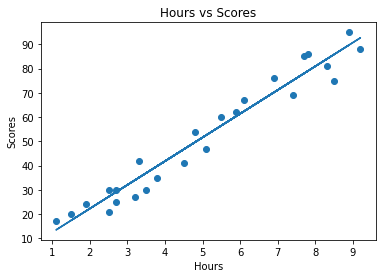

In [6]:
#plotting the data and regression line
m = model.coef_ # slope
c = model.intercept_ # intercept
line = m*X+c   

plt.title("Hours vs Scores")
plt.scatter(X, y)  
plt.plot(X, line) 
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [7]:
# predicting the scores for test data (hours)
print("This is the test data (hours)")
print("1. ",X_test[0]," hours")
print("2. ",X_test[1]," hours")
print("3. ",X_test[2]," hours")
predicted_score = model.predict(X_test)  
print("These are the predicted scores for that test data")
print("1. ",round(predicted_score[0],2)," %")
print("2. ",round(predicted_score[1],2)," %")
print("3. ",round(predicted_score[2],2)," %")

This is the test data (hours)
1.  [8.3]  hours
2.  [2.5]  hours
3.  [2.5]  hours
These are the predicted scores for that test data
1.  83.9  %
2.  27.15  %
3.  27.15  %


In [8]:
# displaying the actual and predicted scores side by side
Predictions = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_score})    
Predictions

,Actual,Predicted
0,81,83.897278
1,30,27.150923
2,21,27.150923


In [9]:
# checking the accuracy of model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_score))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_score))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_score)))

Mean Absolute Error: 3.9657593887812133
Mean Squared Error: 18.11510415783113
Root Mean Squared Error: 4.256184225081326


In [10]:
# how accurate is the model?
Accuracy = round(100*(1-metrics.mean_absolute_percentage_error(y_test,predicted_score)),0)
print("This model is ",Accuracy,"% accurate")

This model is  86.0 % accurate
